<a href="https://colab.research.google.com/github/Shona1709/ML/blob/Python-scripts/Final_feed_forward_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('dataset_feature_selection.csv')
df

,diagnosis,texture_mean,concavity_mean,concave points_mean,area_se,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,M,10.38,0.30010,0.14710,153.40,17.33,184.60,2019.0,0.7119,0.2654
1,M,17.77,0.08690,0.07017,74.08,23.41,158.80,1956.0,0.2416,0.1860
2,M,21.25,0.19740,0.12790,94.03,25.53,152.50,1709.0,0.4504,0.2430
3,M,20.38,0.24140,0.10520,27.23,26.50,98.87,567.7,0.6869,0.2575
4,M,14.34,0.19800,0.10430,94.44,16.67,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,M,22.39,0.24390,0.13890,158.70,26.40,166.10,2027.0,0.4107,0.2216
565,M,28.25,0.14400,0.09791,99.04,38.25,155.00,1731.0,0.3215,0.1628
566,M,28.08,0.09251,0.05302,48.55,34.12,126.70,1124.0,0.3403,0.1418
567,M,29.33,0.35140,0.15200,86.22,39.42,184.60,1821.0,0.9387,0.2650


In [ ]:
df=df.replace("B", 0.0)
df

,diagnosis,texture_mean,concavity_mean,concave points_mean,area_se,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,M,10.38,0.30010,0.14710,153.40,17.33,184.60,2019.0,0.7119,0.2654
1,M,17.77,0.08690,0.07017,74.08,23.41,158.80,1956.0,0.2416,0.1860
2,M,21.25,0.19740,0.12790,94.03,25.53,152.50,1709.0,0.4504,0.2430
3,M,20.38,0.24140,0.10520,27.23,26.50,98.87,567.7,0.6869,0.2575
4,M,14.34,0.19800,0.10430,94.44,16.67,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,M,22.39,0.24390,0.13890,158.70,26.40,166.10,2027.0,0.4107,0.2216
565,M,28.25,0.14400,0.09791,99.04,38.25,155.00,1731.0,0.3215,0.1628
566,M,28.08,0.09251,0.05302,48.55,34.12,126.70,1124.0,0.3403,0.1418
567,M,29.33,0.35140,0.15200,86.22,39.42,184.60,1821.0,0.9387,0.2650


In [ ]:
df=df.replace("M", 1.0)
df

,diagnosis,texture_mean,concavity_mean,concave points_mean,area_se,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,1.0,10.38,0.30010,0.14710,153.40,17.33,184.60,2019.0,0.7119,0.2654
1,1.0,17.77,0.08690,0.07017,74.08,23.41,158.80,1956.0,0.2416,0.1860
2,1.0,21.25,0.19740,0.12790,94.03,25.53,152.50,1709.0,0.4504,0.2430
3,1.0,20.38,0.24140,0.10520,27.23,26.50,98.87,567.7,0.6869,0.2575
4,1.0,14.34,0.19800,0.10430,94.44,16.67,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...,...,...,...
564,1.0,22.39,0.24390,0.13890,158.70,26.40,166.10,2027.0,0.4107,0.2216
565,1.0,28.25,0.14400,0.09791,99.04,38.25,155.00,1731.0,0.3215,0.1628
566,1.0,28.08,0.09251,0.05302,48.55,34.12,126.70,1124.0,0.3403,0.1418
567,1.0,29.33,0.35140,0.15200,86.22,39.42,184.60,1821.0,0.9387,0.2650


In [ ]:
dataset = df.values
dataset

array([[1.000e+00, 1.038e+01, 3.001e-01, ..., 2.019e+03, 7.119e-01,
        2.654e-01],
       [1.000e+00, 1.777e+01, 8.690e-02, ..., 1.956e+03, 2.416e-01,
        1.860e-01],
       [1.000e+00, 2.125e+01, 1.974e-01, ..., 1.709e+03, 4.504e-01,
        2.430e-01],
       ...,
       [1.000e+00, 2.808e+01, 9.251e-02, ..., 1.124e+03, 3.403e-01,
        1.418e-01],
       [1.000e+00, 2.933e+01, 3.514e-01, ..., 1.821e+03, 9.387e-01,
        2.650e-01],
       [0.000e+00, 2.454e+01, 0.000e+00, ..., 2.686e+02, 0.000e+00,
        0.000e+00]])

In [ ]:
X = dataset[:,1:10]
Y = dataset[:,0]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0226581 , 0.70313964, 0.73111332, ..., 0.45069799, 0.56861022,
        0.91202749],
       [0.27257355, 0.20360825, 0.34875746, ..., 0.43521431, 0.19297125,
        0.63917526],
       [0.3902604 , 0.46251172, 0.63568588, ..., 0.37450845, 0.35974441,
        0.83505155],
       ...,
       [0.62123774, 0.21675258, 0.26351889, ..., 0.23073142, 0.27180511,
        0.48728522],
       [0.66351031, 0.82333646, 0.7554672 , ..., 0.402035  , 0.74976038,
        0.91065292],
       [0.50152181, 0.        , 0.        , ..., 0.02049744, 0.        ,
        0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(398, 9) (85, 9) (86, 9) (398,) (85,) (86,)


In [ ]:
from keras.layers import Dropout
from keras import regularizers
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [ ]:
model1 = Sequential([
    Dense(7, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)),Dropout(0.3),
    Dense(7, activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),

     Dense(7, activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),

    Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist1=model1.fit(X_train, Y_train,
          batch_size=20, epochs=150,
          validation_data=(X_val, Y_val))

Train on 398 samples, validate on 85 samples
Epoch 1/150
398/398 [==============================] - 0s 113us/step - loss: 0.3825 - accuracy: 0.9196 - val_loss: 0.2858 - val_accuracy: 0.9882
Epoch 2/150
398/398 [==============================] - 0s 90us/step - loss: 0.3860 - accuracy: 0.9196 - val_loss: 0.2848 - val_accuracy: 0.9882
Epoch 3/150
398/398 [==============================] - 0s 85us/step - loss: 0.3822 - accuracy: 0.9196 - val_loss: 0.2825 - val_accuracy: 0.9882
Epoch 4/150
398/398 [==============================] - 0s 84us/step - loss: 0.3883 - accuracy: 0.9246 - val_loss: 0.2846 - val_accuracy: 0.9882
Epoch 5/150
398/398 [==============================] - 0s 88us/step - loss: 0.3819 - accuracy: 0.9347 - val_loss: 0.2916 - val_accuracy: 0.9765
Epoch 6/150
398/398 [==============================] - 0s 88us/step - loss: 0.3770 - accuracy: 0.9271 - val_loss: 0.2856 - val_accuracy: 0.9882
Epoch 7/150
398/398 [==============================] - 0s 83us/step - loss: 0.3540 - accur

In [ ]:
score=model1.evaluate(X_test,Y_test,verbose=1)
print(score)

86/86 [==============================] - 0s 90us/step
[0.31698496189228326, 0.9534883499145508]


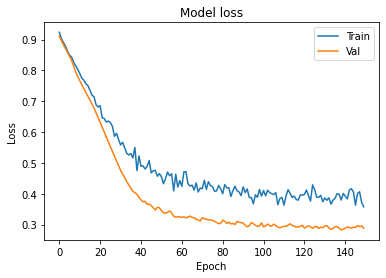

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

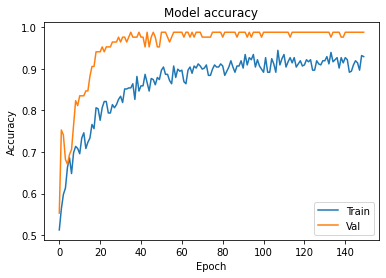

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Recall is:  0.8857142857142857
Accuracy is:  0.9534883720930233
F1 score is:  0.9393939393939393


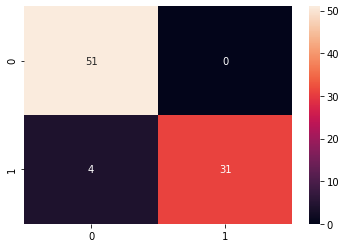

In [ ]:
recall = recall_score(Y_test,model1.predict(X_test).round())
print('Recall is: ', recall)
accuracy = accuracy_score(Y_test,model1.predict(X_test).round())
print('Accuracy is: ', accuracy)
f1 = f1_score(Y_test,model1.predict(X_test).round())
print('F1 score is: ', f1)
cm = confusion_matrix(Y_test,model1.predict(X_test).round())
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(9,9,9),max_iter=500)

In [ ]:
hist2=mlp.fit(X_train,Y_train)

In [ ]:
predictions = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
import seaborn as sns

Accuracy is:  0.9651162790697675


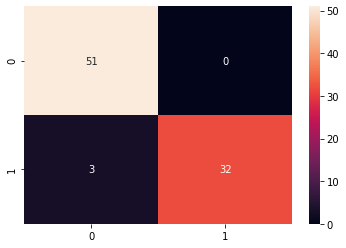

In [ ]:

accuracy = accuracy_score(Y_test,mlp.predict(X_test).round())
print('Accuracy is: ', accuracy)

cm = confusion_matrix(Y_test,mlp.predict(X_test).round())
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
model2 = Sequential([
    Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)),Dropout(0.3),
    Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),

     Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),

    Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist2=model2.fit(X_train, Y_train,
          batch_size=20, epochs=150,
          validation_data=(X_val, Y_val))

Train on 398 samples, validate on 85 samples
Epoch 1/150
398/398 [==============================] - 0s 670us/step - loss: 0.9690 - accuracy: 0.4523 - val_loss: 0.9507 - val_accuracy: 0.5294
Epoch 2/150
398/398 [==============================] - 0s 109us/step - loss: 0.9365 - accuracy: 0.5503 - val_loss: 0.9256 - val_accuracy: 0.6941
Epoch 3/150
398/398 [==============================] - 0s 84us/step - loss: 0.9111 - accuracy: 0.6457 - val_loss: 0.8995 - val_accuracy: 0.6706
Epoch 4/150
398/398 [==============================] - 0s 83us/step - loss: 0.8902 - accuracy: 0.6608 - val_loss: 0.8773 - val_accuracy: 0.6706
Epoch 5/150
398/398 [==============================] - 0s 101us/step - loss: 0.8679 - accuracy: 0.7085 - val_loss: 0.8571 - val_accuracy: 0.6706
Epoch 6/150
398/398 [==============================] - 0s 92us/step - loss: 0.8480 - accuracy: 0.7035 - val_loss: 0.8369 - val_accuracy: 0.6706
Epoch 7/150
398/398 [==============================] - 0s 86us/step - loss: 0.8314 - acc

In [ ]:
score=model2.evaluate(X_test,Y_test,verbose=1)
print(score)

86/86 [==============================] - 0s 79us/step
[0.3171643573184346, 0.9651162624359131]


In [ ]:
predictions = model2.predict_classes(X_val)
# summarize the first 10 cases
for i in range(10):
	print('%s => %d (expected %d)' % (X_val[i].tolist(), predictions[i], Y_val[i]))

[0.31078796077105164, 0.5147610121836925, 0.5278330019880716, 0.23570876245335246, 0.37899786780383793, 0.6010757507844016, 0.4590542666142351, 0.48889776357827475, 0.6804123711340206] => 1 (expected 1)
[0.2904971254649983, 0.0931115276476101, 0.13817097415506957, 0.03440057676719001, 0.3710021321961622, 0.23497186114846358, 0.12637632717263075, 0.11030351437699681, 0.27185567010309275] => 0 (expected 0)
[0.17653026716266484, 0.0830834114339269, 0.10308151093439365, 0.009110979122073669, 0.23480810234541583, 0.14602320832710797, 0.06436787259142746, 0.12404153354632588, 0.23209621993127147] => 0 (expected 0)
[0.3175515725397362, 0.13917525773195874, 0.23951292246520872, 0.033746857477988335, 0.37766524520255873, 0.29229543303949396, 0.15350963429020842, 0.1440894568690096, 0.5116838487972508] => 1 (expected 0)
[0.5701724721001014, 0.5827085285848171, 0.7435387673956263, 0.13944392769491104, 0.5719616204690832, 0.627969520394442, 0.4679020841525757, 0.5415335463258786, 0.997594501718213

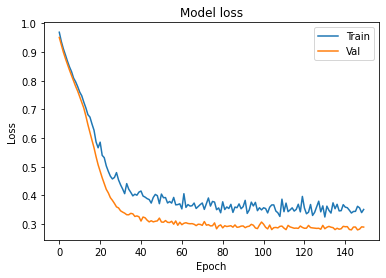

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

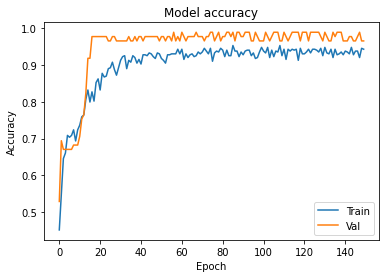

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
import seaborn as sns

Recall is:  0.9142857142857143
Accuracy is:  0.9651162790697675
F1 score is:  0.955223880597015


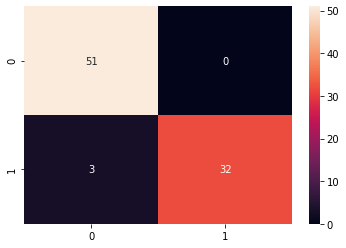

In [ ]:
recall = recall_score(Y_test,model2.predict(X_test).round())
print('Recall is: ', recall)
accuracy = accuracy_score(Y_test,model2.predict(X_test).round())
print('Accuracy is: ', accuracy)
f1 = f1_score(Y_test,model2.predict(X_test).round())
print('F1 score is: ', f1)
cm = confusion_matrix(Y_test,model2.predict(X_test).round())
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from keras.layers import Dropout
from keras import regularizers
import keras
from keras.models import Sequential
from keras.layers import Dense
model3 = Sequential([
    Dense(8, activation='relu', input_shape=(9,)),
    Dense(8, activation='relu'),

     Dense(8, activation='relu'),

    Dense(1, activation='sigmoid'),
])

In [ ]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hist3=model3.fit(X_train, Y_train,
          batch_size=20, epochs=150,
          validation_data=(X_val, Y_val))

Train on 398 samples, validate on 85 samples
Epoch 1/150
398/398 [==============================] - 0s 412us/step - loss: 0.6897 - accuracy: 0.6231 - val_loss: 0.6777 - val_accuracy: 0.6941
Epoch 2/150
398/398 [==============================] - 0s 88us/step - loss: 0.6715 - accuracy: 0.7261 - val_loss: 0.6604 - val_accuracy: 0.7294
Epoch 3/150
398/398 [==============================] - 0s 82us/step - loss: 0.6543 - accuracy: 0.7588 - val_loss: 0.6417 - val_accuracy: 0.7647
Epoch 4/150
398/398 [==============================] - 0s 94us/step - loss: 0.6345 - accuracy: 0.8367 - val_loss: 0.6193 - val_accuracy: 0.8471
Epoch 5/150
398/398 [==============================] - 0s 87us/step - loss: 0.6102 - accuracy: 0.8894 - val_loss: 0.5905 - val_accuracy: 0.8941
Epoch 6/150
398/398 [==============================] - 0s 85us/step - loss: 0.5783 - accuracy: 0.8844 - val_loss: 0.5504 - val_accuracy: 0.8941
Epoch 7/150
398/398 [==============================] - 0s 87us/step - loss: 0.5350 - accur

In [ ]:
score=model3.evaluate(X_test,Y_test,verbose=1)
print(score)

86/86 [==============================] - 0s 45us/step
[0.0813522494809572, 0.9534883499145508]


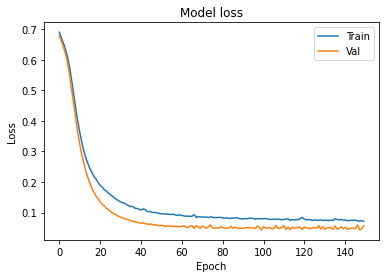

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

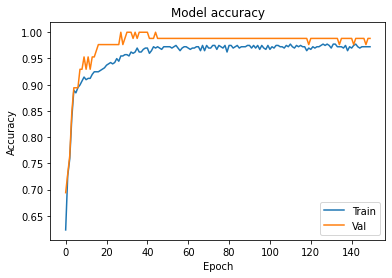

In [ ]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Recall is:  0.9111111111111111
Accuracy is:  0.9534883720930233
F1 score is:  0.9534883720930233


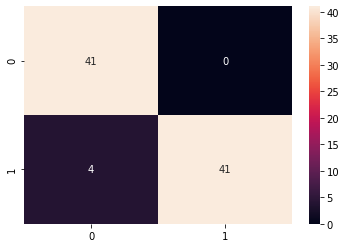

In [ ]:
recall = recall_score(Y_test,model3.predict(X_test).round())
print('Recall is: ', recall)
accuracy = accuracy_score(Y_test,model3.predict(X_test).round())
print('Accuracy is: ', accuracy)
f1 = f1_score(Y_test,model3.predict(X_test).round())
print('F1 score is: ', f1)
cm = confusion_matrix(Y_test,model3.predict(X_test).round())
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
model4 = Sequential([
    Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(9,)),Dropout(0.3),
    Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),

     Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.01)),Dropout(0.3),

    Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
hist4=model4.fit(X_train, Y_train,
          batch_size=20, epochs=150,
          validation_data=(X_val, Y_val))

Train on 398 samples, validate on 85 samples
Epoch 1/150
398/398 [==============================] - 0s 638us/step - loss: 0.9774 - accuracy: 0.5050 - val_loss: 0.9465 - val_accuracy: 0.3647
Epoch 2/150
398/398 [==============================] - 0s 82us/step - loss: 0.9365 - accuracy: 0.6005 - val_loss: 0.9121 - val_accuracy: 0.8353
Epoch 3/150
398/398 [==============================] - 0s 83us/step - loss: 0.9073 - accuracy: 0.6432 - val_loss: 0.8813 - val_accuracy: 0.8824
Epoch 4/150
398/398 [==============================] - 0s 80us/step - loss: 0.8795 - accuracy: 0.6759 - val_loss: 0.8530 - val_accuracy: 0.8000
Epoch 5/150
398/398 [==============================] - 0s 85us/step - loss: 0.8528 - accuracy: 0.7186 - val_loss: 0.8236 - val_accuracy: 0.7294
Epoch 6/150
398/398 [==============================] - 0s 93us/step - loss: 0.8332 - accuracy: 0.7035 - val_loss: 0.7963 - val_accuracy: 0.7412
Epoch 7/150
398/398 [==============================] - 0s 94us/step - loss: 0.8127 - accur

In [ ]:
score=model4.evaluate(X_test,Y_test,verbose=1)
print(score)

86/86 [==============================] - 0s 90us/step
[0.30907403313836385, 0.9418604373931885]


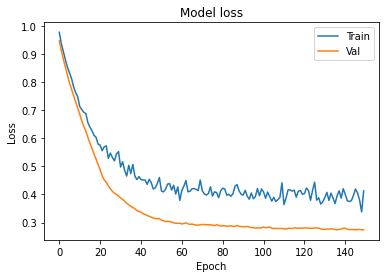

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

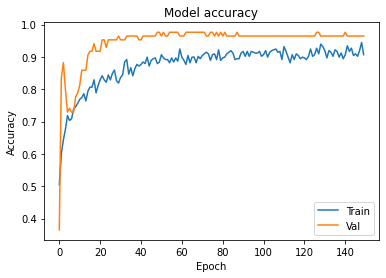

In [ ]:
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()